# Basic Dense Model

In [4]:
%matplotlib inline
#import theano
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import seaborn as sns; sns.set()

In [5]:
#theano.config.floatX = 'float32'
mnist = fetch_mldata('MNIST original', data_home='.\Sklearn\data\mnist')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'])
#X_train = X_train.astype(theano.config.floatX)
#X_test = X_test.astype(theano.config.floatX)
y_train_ohe = np_utils.to_categorical(y_train)

In [11]:
X_train.shape

(52500, 784)

In [12]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix

In [13]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1],output_dim=80,init='uniform',activation='tanh'))
model.add(Dense(input_dim=80,output_dim=50,init='uniform',activation='tanh'))
model.add(Dense(input_dim=50,output_dim=y_train_ohe.shape[1],init='uniform',activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                62800     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                4050      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 67,360
Trainable params: 67,360
Non-trainable params: 0
_________________________________________________________________


/Users/ZhuJiaqi517/anaconda/envs/aind/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="tanh", units=80, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/Users/ZhuJiaqi517/anaconda/envs/aind/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=80, activation="tanh", units=50, kernel_initializer="uniform")`
  app.launch_new_instance()
/Users/ZhuJiaqi517/anaconda/envs/aind/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="softmax", units=10, kernel_initializer="uniform")`


In [14]:
from keras.utils import plot_model
plot_model(model,to_file = 'model.png')

In [7]:
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.fit(X_train,y_train_ohe,nb_epoch=100,batch_size=300,verbose=1,validation_split=0.1)

Train on 47250 samples, validate on 5250 samples
Epoch 1/100
47250/47250 [==============================] - 0s - loss: 2.2265 - acc: 0.3510 - val_loss: 2.1015 - val_acc: 0.5297
Epoch 2/100
47250/47250 [==============================] - 0s - loss: 1.8671 - acc: 0.5527 - val_loss: 1.5987 - val_acc: 0.5872
Epoch 3/100
47250/47250 [==============================] - 0s - loss: 1.3586 - acc: 0.6416 - val_loss: 1.1521 - val_acc: 0.7017
Epoch 4/100
47250/47250 [==============================] - 0s - loss: 1.0022 - acc: 0.7594 - val_loss: 0.8712 - val_acc: 0.8023
Epoch 5/100
47250/47250 [==============================] - 0s - loss: 0.7740 - acc: 0.8301 - val_loss: 0.6889 - val_acc: 0.8469
Epoch 6/100
47250/47250 [==============================] - 0s - loss: 0.6263 - acc: 0.8589 - val_loss: 0.5744 - val_acc: 0.8659
Epoch 7/100
47250/47250 [==============================] - 0s - loss: 0.5321 - acc: 0.8755 - val_loss: 0.5054 - val_acc: 0.8724
Epoch 8/100
47250/47250 [==============================

In [8]:
y_train_pred = model.predict_classes(X_train, verbose=0)
print('First 3 predictions: ', y_train_pred[:3])

train_acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (train_acc * 100))

y_test_pred = model.predict_classes(X_test, verbose=0)
test_acc = np.sum(y_test == y_test_pred,axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (test_acc * 100))

First 3 predictions:  [8 9 5]
Training accuracy: 96.54%
Test accuracy: 95.42%


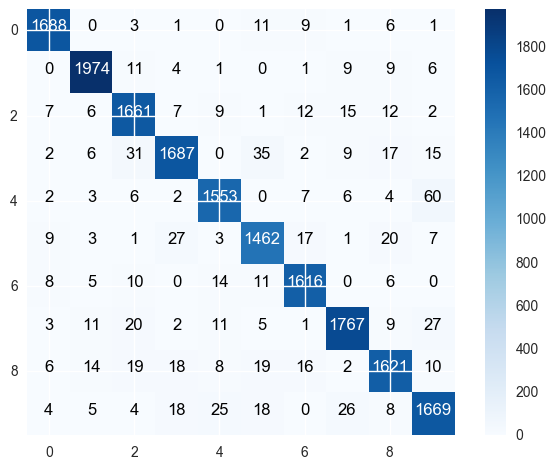

In [9]:
cm = confusion_matrix(y_test, y_test_pred)
plt.imshow(cm, interpolation='nearest',cmap = plt.cm.Blues)
plt.colorbar()
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > cm.max() / 2 else "black")

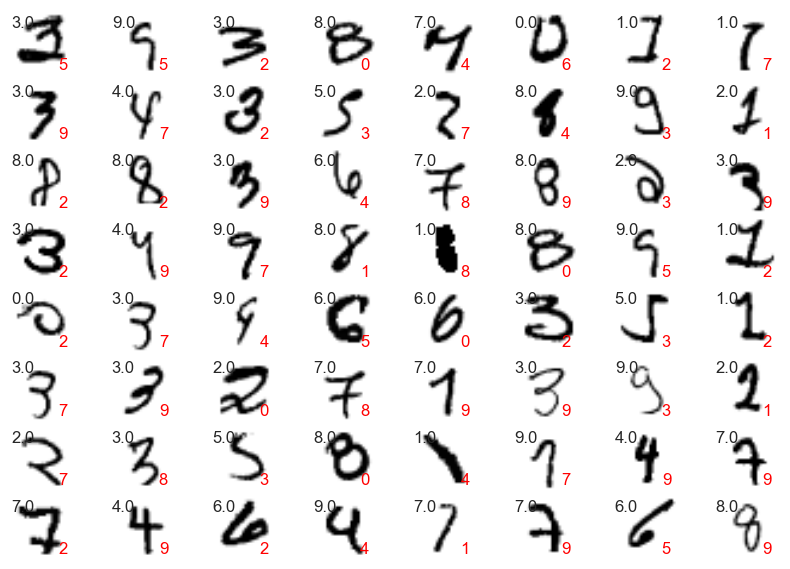

In [10]:
X_test_wrong = X_test[y_test != y_test_pred]
y_test_wrong = y_test[y_test != y_test_pred]
y_pred_wrong = y_test_pred[y_test != y_test_pred]

fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
pick = (np.random.rand(64) * len(y_test_wrong)).astype(int)
for i,j in enumerate(pick):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test_wrong[j].reshape(28,28), cmap=plt.cm.binary)
    ax.text(0, 7, str(y_test_wrong[j]))
    ax.text(20, 25, str(y_pred_wrong[j]), color = 'red')

## A VGG Like Model

## Pre-process and Data Augument

In [5]:
batch_size=32

In [6]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
X_test = np.expand_dims(X_test,1)
X_train = np.expand_dims(X_train,1)

In [8]:
X_train.shape

(60000, 1, 28, 28)

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
y_train[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [13]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
def norm_input(x): return (x-mean_px)/std_px

In [16]:
from keras.preprocessing import image
gen = image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
test_batches = gen.flow(X_test, y_test, batch_size=64)

## Create Model and Fit

In [19]:
import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Input, Embedding, Reshape, merge, LSTM, Bidirectional
from keras.layers import TimeDistributed, Activation, SimpleRNN, GRU
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.regularizers import l2, activity_l2, l1, activity_l1
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils.layer_utils import layer_from_config
from keras.metrics import categorical_crossentropy, categorical_accuracy
from keras.layers.convolutional import *
from keras.preprocessing import image, sequence
from keras.preprocessing.text import Tokenizer

In [20]:
def get_model_bn_do():
    model = Sequential([
        Lambda(norm_input, input_shape=(1,28,28),output_shape=(1,28,28)),
        Convolution2D(32,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,3,3, activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,3,3, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
model = get_model_bn_do()
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 1, 28, 28)     0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 32, 26, 26)    320         lambda_1[0][0]                   
____________________________________________________________________________________________________
batchnormalization_1 (BatchNorma (None, 32, 26, 26)    128         convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 24, 24)    9248        batchnormalization_1[0][0]       
___________________________________________________________________________________________

In [22]:
model.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/1
60000/60000 [==============================] - 297s - loss: 0.2315 - acc: 0.9307 - val_loss: 0.0761 - val_acc: 0.9783


In [24]:
model.optimizer.lr=0.1
model.fit_generator(batches, batches.n, nb_epoch=4, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/4
60000/60000 [==============================] - 286s - loss: 0.0905 - acc: 0.9726 - val_loss: 0.0517 - val_acc: 0.9834
Epoch 2/4
60000/60000 [==============================] - 287s - loss: 0.0792 - acc: 0.9752 - val_loss: 0.0421 - val_acc: 0.9851
Epoch 3/4
60000/60000 [==============================] - 284s - loss: 0.0680 - acc: 0.9795 - val_loss: 0.0421 - val_acc: 0.9866
Epoch 4/4
60000/60000 [==============================] - 303s - loss: 0.0612 - acc: 0.9808 - val_loss: 0.0477 - val_acc: 0.9853


In [26]:
model.save_weights('./mnist_weight.h5')

In [ ]:
model.load_weights('mnist_weight.h5')

In [ ]:
model.optimizer.lr=0.01
model.fit_generator(batches, batches.n, nb_epoch=12, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

In [ ]:
model.optimizer.lr=0.001
model.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

## Ensembling

In [ ]:
def fit_model():
    model = get_model_bn_do()
    model.fit_generator(batches, batches.N, nb_epoch=1, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.N)
    model.optimizer.lr=0.1
    model.fit_generator(batches, batches.N, nb_epoch=4, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.N)
    model.optimizer.lr=0.01
    model.fit_generator(batches, batches.N, nb_epoch=12, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.N)
    model.optimizer.lr=0.001
    model.fit_generator(batches, batches.N, nb_epoch=18, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.N)
    return model

In [ ]:
models = [fit_model() for i in range(6)]

In [ ]:
path = "data/mnist/"
model_path = path + 'models/'

In [ ]:
for i,m in enumerate(models):
    m.save_weights(model_path+'cnn-mnist23-'+str(i)+'.pkl')

In [ ]:
evals = np.array([m.evaluate(X_test, y_test, batch_size=256) for m in models])

In [ ]:
evals.mean(axis=0)

In [ ]:
all_preds = np.stack([m.predict(X_test, batch_size=256) for m in models])

In [ ]:
all_preds.shape

In [ ]:
avg_preds = all_preds.mean(axis=0)

In [ ]:
keras.metrics.categorical_accuracy(y_test, avg_preds).eval()